In [2]:
import pandas as pd

# Load the dataset
file_path = r"D:\PW\files\spotify.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for incorrect types
print("\nUnique Values in Each Column (for validation):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Check if numeric columns contain non-numeric data
print("\nChecking for non-numeric values in numeric columns:")
numeric_cols = ["Popularity", "Duration (ms)"]
for col in numeric_cols:
    if not pd.to_numeric(df[col], errors="coerce").notnull().all():
        print(f"⚠️ Issue found in column: {col}")

# Summary
print("\nSummary Statistics:")
print(df.describe())



Data Types:
Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

Unique Values in Each Column (for validation):
Artist: 115 unique values
Track Name: 412 unique values
Popularity: 51 unique values
Duration (ms): 410 unique values
Track ID: 413 unique values

Checking for non-numeric values in numeric columns:

Summary Statistics:
       Popularity  Duration (ms)
count  440.000000     440.000000
mean    75.736364  206810.040909
std      9.886534   53576.930289
min     29.000000   81666.000000
25%     70.000000  172778.500000
50%     77.000000  201866.000000
75%     83.000000  235119.750000
max     97.000000  501648.000000


In [4]:
# Q-1
import pandas as pd

# Load the dataset
file_path = r"D:\PW\files\spotify.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

# Handle missing values (if any)
df_cleaned = df.dropna()  # Drop rows with missing values (if present)

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display updated dataset info
print("\nUpdated Dataset Info:")
print(df_cleaned.info())

# Save the cleaned dataset
df_cleaned.to_csv("spotify_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'spotify_cleaned.csv'.")



Missing Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of Duplicate Rows: 27

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB
None

Cleaned dataset saved as 'spotify_cleaned.csv'.


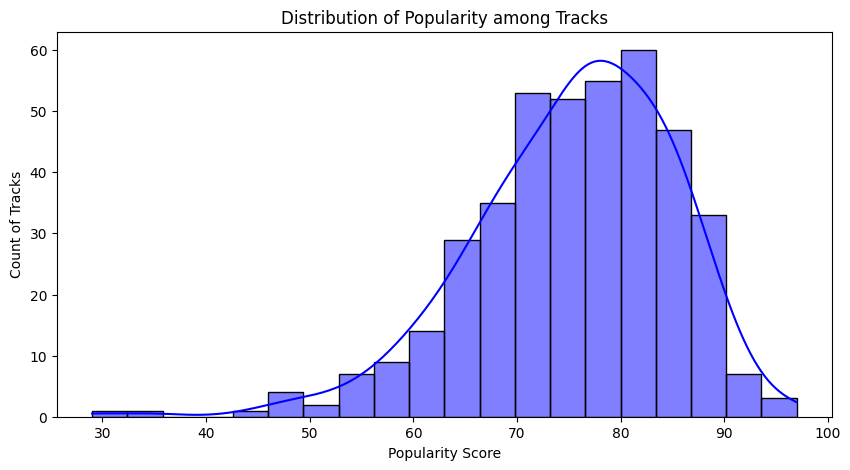

In [5]:
# Q-2
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of popularity
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Popularity"], bins=20, kde=True, color="blue")
plt.xlabel("Popularity Score")
plt.ylabel("Count of Tracks")
plt.title("Distribution of Popularity among Tracks")
plt.show()




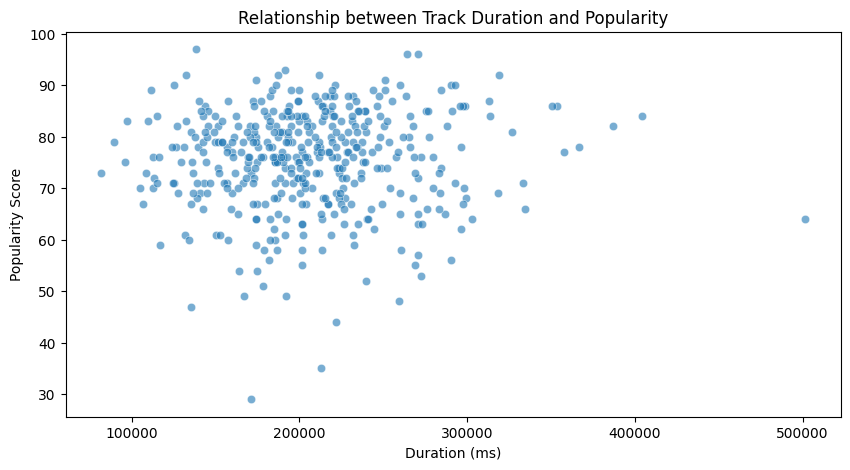

In [6]:
# Q-3
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Popularity vs Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cleaned["Duration (ms)"], y=df_cleaned["Popularity"], alpha=0.6)
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity Score")
plt.title("Relationship between Track Duration and Popularity")
plt.show()


Artist with the most tracks: Drake (17 tracks)


C:\Users\jaykh\AppData\Local\Temp\ipykernel_16768\617872314.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned["Artist"], order=artist_counts.index[:10], palette="viridis")


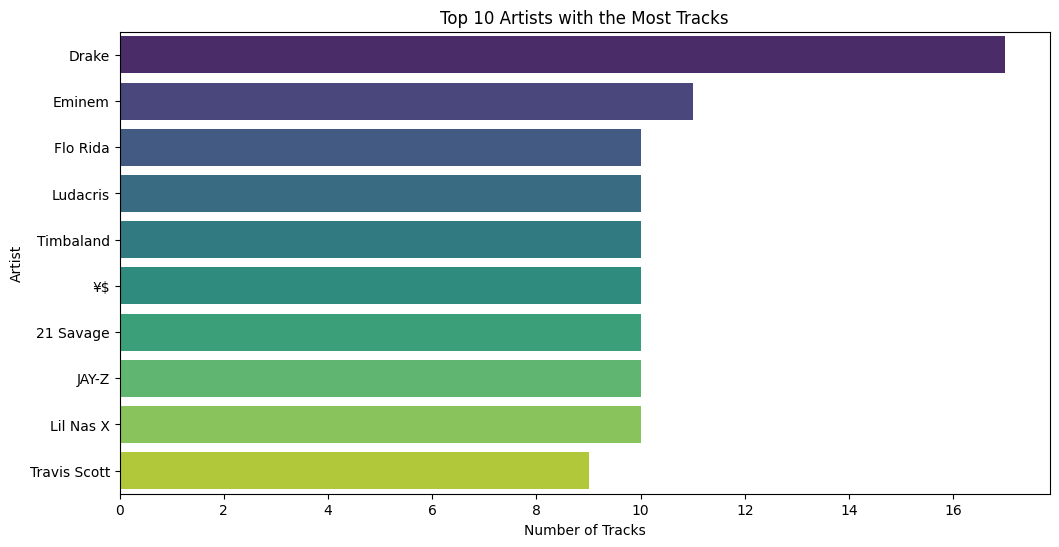

In [7]:
# Q-4
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tracks per artist
artist_counts = df_cleaned["Artist"].value_counts()

# Find the artist with the highest number of tracks
top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"Artist with the most tracks: {top_artist} ({top_count} tracks)")

# Plot the count of tracks per artist (Top 10 for better visualization)
plt.figure(figsize=(12, 6))
sns.countplot(y=df_cleaned["Artist"], order=artist_counts.index[:10], palette="viridis")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.title("Top 10 Artists with the Most Tracks")
plt.show()


In [8]:
# Q-5
# Sorting the dataset by 'Popularity' in ascending order and getting the top 5 least popular tracks
least_popular_tracks = df_cleaned.sort_values(by='Popularity').head(5)
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [9]:
# Q-6
# Grouping by artist and calculating the average popularity
avg_popularity_per_artist = df_cleaned.groupby('Artist')['Popularity'].mean()

# Sorting by average popularity and getting the top 5 most popular artists
top_5_artists = avg_popularity_per_artist.sort_values(ascending=False).head(5)

# Displaying the artist with the highest average popularity
top_5_artists


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [10]:
# Q-7
# Sorting by artist and popularity to get the most popular track for each of the top 5 artists
top_5_artists_tracks = df_cleaned[df_cleaned['Artist'].isin(top_5_artists.index)]
most_popular_tracks_per_artist = top_5_artists_tracks.sort_values(by=['Artist', 'Popularity'], ascending=[True, False])

# List the most popular track for each top artist
most_popular_tracks_per_artist.groupby('Artist').head(1)[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


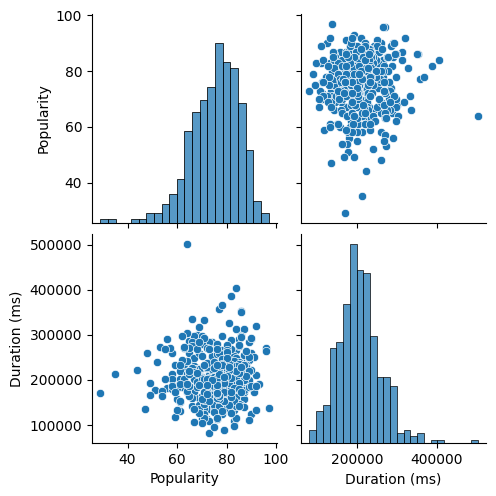

In [19]:
# Q-8
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']
# sns.pairplot(df_cleaned[numerical_columns])
# plt.show()
# Pair plot with specific numerical columns for clarity
sns.pairplot(df_cleaned[['Popularity', 'Duration (ms)']])
plt.show()



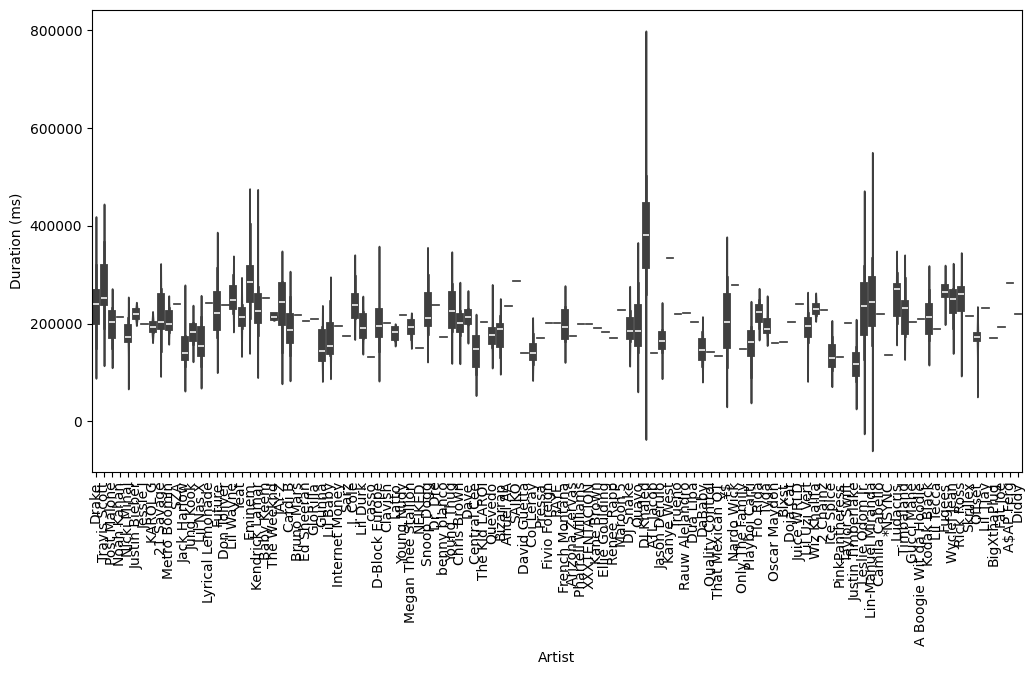

In [16]:
# Q-9
# Violin plot to visualize the distribution of track durations by artist
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
sns.violinplot(x='Artist', y='Duration (ms)', data=df_cleaned)
plt.xticks(rotation=90)  # Rotate artist names for better visibility
plt.show()



c:\Users\jaykh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaykh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaykh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaykh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

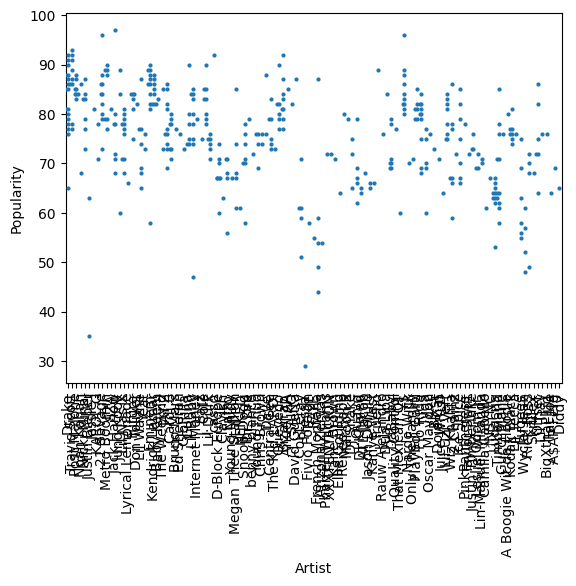

In [15]:
# Q-10
# Swarm plot to visualize the distribution of track popularity for each artist
# Adjusting the marker size to reduce overlap
sns.swarmplot(x='Artist', y='Popularity', data=df_cleaned, size=3)
plt.xticks(rotation=90)  # Rotate artist names for better visibility
plt.show()


